In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

I got this data from https://www.kaggle.com/datasets/sazidthe1/global-happiness-scores-and-factors

It lists all countries' happiness score alongside factors such as GDP per capita, life expectancy which may impact happiness. 

In [38]:
worldhap23 = pd.read_csv('World Happiness 2023.csv', sep=',')

In [39]:
worldhap23_df.describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
count,137.000000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000
mean,5.539796,1.406985,1.156212,0.366176,0.540000,0.148474,0.145898
std,1.139929,0.432963,0.326322,0.156691,0.149501,0.076053,0.126723
min,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.724000,1.099000,0.962000,0.248500,0.455000,0.097000,0.060000
50%,5.684000,1.449000,1.227000,0.389500,0.557000,0.137000,0.111000
75%,6.334000,1.798000,1.401000,0.487500,0.656000,0.199000,0.187000
max,7.804000,2.200000,1.620000,0.702000,0.772000,0.422000,0.561000


array([[<Axes: title={'center': 'happiness_score'}>]], dtype=object)

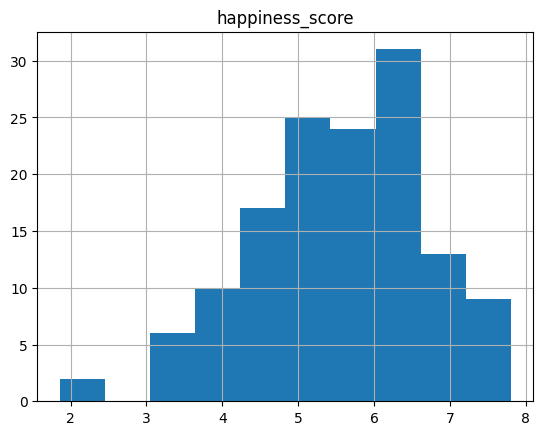

In [4]:
worldhap23_df.hist('happiness_score')

<Axes: xlabel='perceptions_of_corruption', ylabel='happiness_score'>

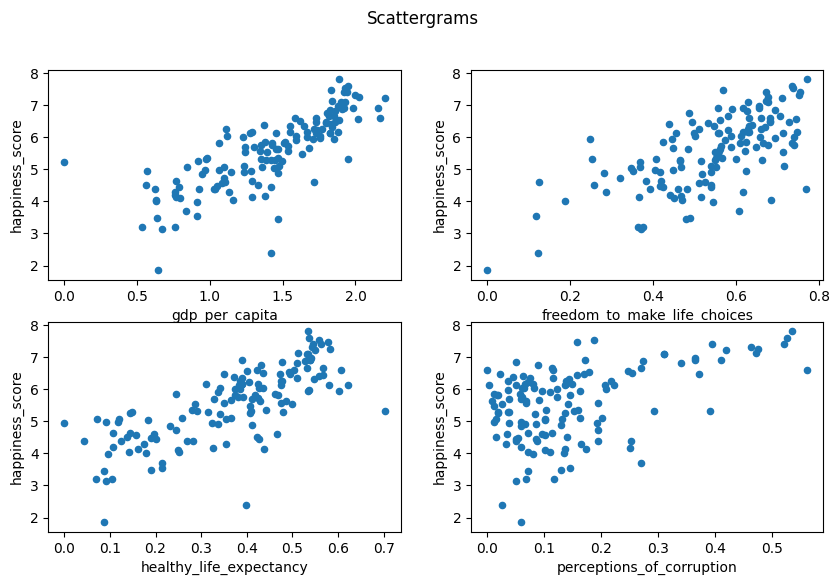

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

fig.suptitle('Scattergrams')
worldhap23_df.plot.scatter(x='gdp_per_capita',y='happiness_score',ax=axes[0,0])

worldhap23_df.plot.scatter(x='healthy_life_expectancy',y='happiness_score' , ax=axes[1,0])
worldhap23_df.plot.scatter(x='freedom_to_make_life_choices',y='happiness_score',ax=axes[0,1])
worldhap23_df.plot.scatter(x='perceptions_of_corruption',y='happiness_score',ax=axes[1,1])




Note that "perceptions of corruption" is mischaracterised, high is least corrupt.That graph is a funny shape: low curruption is associated with high happiness, but high corruption appears to make no difference. 

I would like to take a closer look at these. There has to be an easier way than creating a separate csv, but I don't know it.

In [37]:

worldhap23_df[worldhap23_df['perceptions_of_corruption']>0.3].to_csv('cleanest.csv')


In [48]:
cleanest_df = pd.read_csv('cleanest.csv', sep=',')

In [49]:
print(cleanest_df)

                      country                      region  happiness_score  \
0                     Finland              Western Europe            7.804   
1                     Denmark              Western Europe            7.586   
2                 Netherlands              Western Europe            7.403   
3                      Sweden              Western Europe            7.395   
4                      Norway              Western Europe            7.315   
5                 Switzerland              Western Europe            7.240   
6                  Luxembourg              Western Europe            7.228   
7                 New Zealand       North America and ANZ            7.123   
8                     Austria              Western Europe            7.097   
9                   Australia       North America and ANZ            7.095   
10                     Canada       North America and ANZ            6.961   
11                    Ireland              Western Europe       

There you have it! The clean 16. HK obviously in the relegation zone. 